In [1]:
#importo las librerias que voy a necesitar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.preprocessing import OneHotEncoder
import sklearn
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [2]:
import os

zip_path = "/content/archive.zip"

dataset_name = os.path.splitext(os.path.basename(zip_path))[0]

# Crear un directorio para extraer los archivos del zip
extract_path = os.path.join("/content", "dataset")
os.makedirs(extract_path, exist_ok=True)

# Extraer el contenido del zip en el directorio
!unzip -q "{zip_path}" -d "{extract_path}"

RECORREMOS EL DATASET PARA SABER SUS PRINCIPALES CARACTERISTICAS

In [3]:
datos = pd.read_csv("/content/dataset/GlobalWeatherRepository.csv")
datos

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,Venezuela,Caracas,10.50,-66.92,America/Caracas,1695249000,2023-09-20 18:30,30.0,86.0,Clear,...,5.5,7.7,1,1,06:17 AM,06:25 PM,10:39 AM,10:25 PM,Waxing Crescent,22
4673,Vietnam,Hanoi,21.03,105.85,Asia/Bangkok,1695249000,2023-09-21 05:30,27.0,80.6,Partly cloudy,...,99.4,121.8,4,10,05:45 AM,05:56 PM,10:01 AM,09:10 PM,Waxing Crescent,22
4674,Yemen,Sanaa,15.35,44.21,Asia/Aden,1695249000,2023-09-21 01:30,17.6,63.7,Clear,...,42.1,120.3,3,5,05:52 AM,06:01 PM,10:06 AM,09:36 PM,Waxing Crescent,22
4675,Zambia,Lusaka,-15.42,28.28,Africa/Lusaka,1695249000,2023-09-21 00:30,23.6,74.4,Clear,...,25.9,37.1,2,3,05:58 AM,06:03 PM,09:20 AM,10:40 PM,Waxing Crescent,22


In [4]:
datos['+25°C'] = (datos['temperature_celsius'] > 25).astype(int)

In [5]:
datos

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,+25°C
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93,1
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93,1
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93,1
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93,0
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,Venezuela,Caracas,10.50,-66.92,America/Caracas,1695249000,2023-09-20 18:30,30.0,86.0,Clear,...,7.7,1,1,06:17 AM,06:25 PM,10:39 AM,10:25 PM,Waxing Crescent,22,1
4673,Vietnam,Hanoi,21.03,105.85,Asia/Bangkok,1695249000,2023-09-21 05:30,27.0,80.6,Partly cloudy,...,121.8,4,10,05:45 AM,05:56 PM,10:01 AM,09:10 PM,Waxing Crescent,22,1
4674,Yemen,Sanaa,15.35,44.21,Asia/Aden,1695249000,2023-09-21 01:30,17.6,63.7,Clear,...,120.3,3,5,05:52 AM,06:01 PM,10:06 AM,09:36 PM,Waxing Crescent,22,0
4675,Zambia,Lusaka,-15.42,28.28,Africa/Lusaka,1695249000,2023-09-21 00:30,23.6,74.4,Clear,...,37.1,2,3,05:58 AM,06:03 PM,09:20 AM,10:40 PM,Waxing Crescent,22,0


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       4677 non-null   object 
 1   location_name                 4677 non-null   object 
 2   latitude                      4677 non-null   float64
 3   longitude                     4677 non-null   float64
 4   timezone                      4677 non-null   object 
 5   last_updated_epoch            4677 non-null   int64  
 6   last_updated                  4677 non-null   object 
 7   temperature_celsius           4677 non-null   float64
 8   temperature_fahrenheit        4677 non-null   float64
 9   condition_text                4677 non-null   object 
 10  wind_mph                      4677 non-null   float64
 11  wind_kph                      4677 non-null   float64
 12  wind_degree                   4677 non-null   int64  
 13  win

In [7]:
columnas_seleccionadas = ["+25°C", "latitude", "longitude", "uv_index", "wind_kph", "humidity"]

# Eliminar todas las columnas excepto las seleccionadas
datos = datos[columnas_seleccionadas]

5 atributos numericos a usar: humidity, wind_kph, uv_index, longitud y latitud;

1 categorico (binaria): +25°C

**Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.**

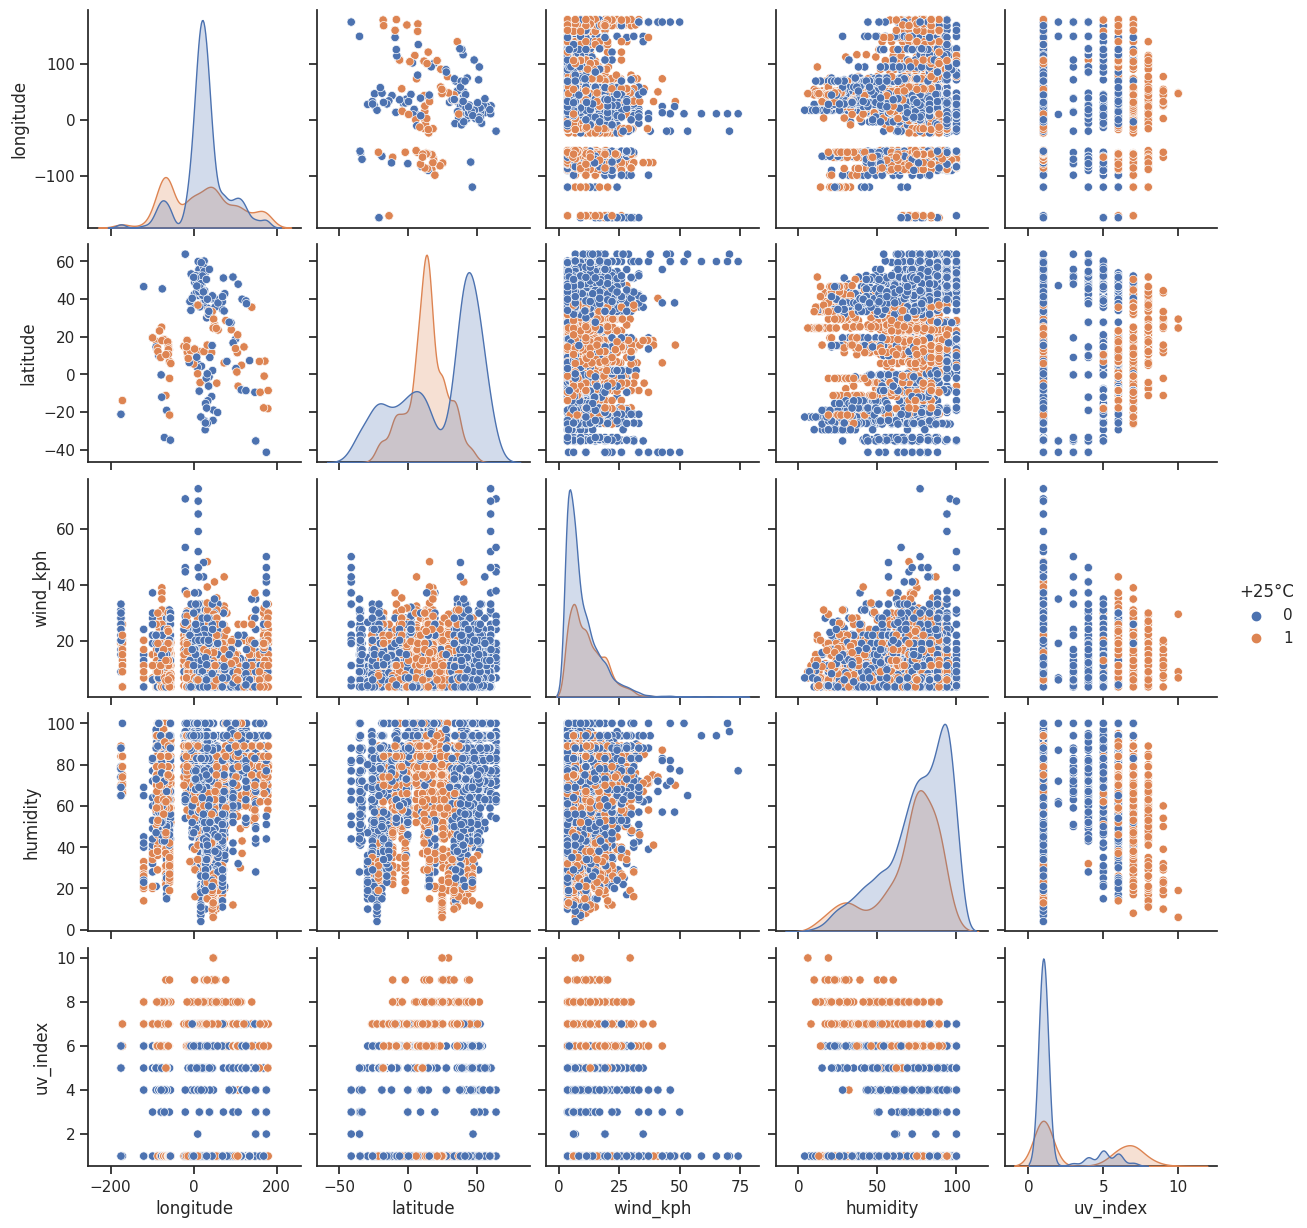

In [8]:
columnas_seleccionadas = ["longitude", "latitude", "wind_kph", "humidity", "uv_index", "+25°C"]

# Configurar el estilo del gráfico
sns.set_theme(style="ticks")

# Crear un gráfico de pares solo con las columnas seleccionadas y colorear según "Enfermedad coronaria"
sns.pairplot(datos[columnas_seleccionadas], hue="+25°C")

# Mostrar el gráfico
plt.show()

In [9]:
print(datos.groupby('+25°C').size())

+25°C
0    2868
1    1809
dtype: int64


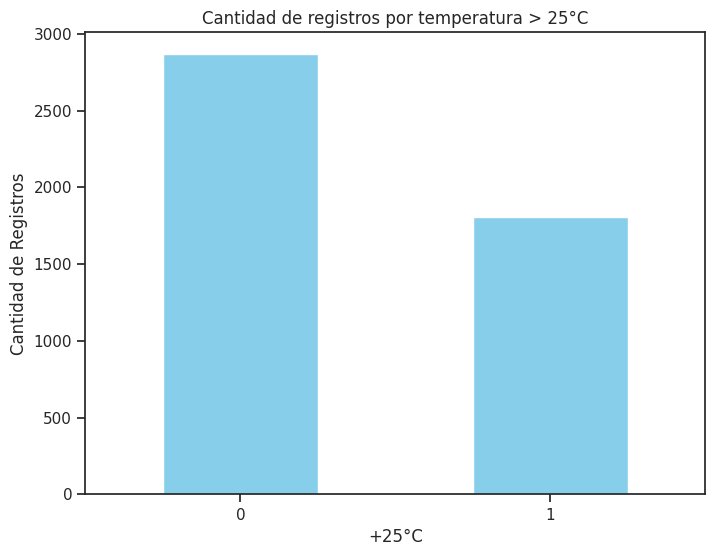

In [10]:
# Obtener la cantidad de registros por valor en la columna '+30°C'
count_30C = datos.groupby('+25°C').size()

# Crear un gráfico de barras para la columna '+30°C'
plt.figure(figsize=(8, 6))
count_30C.plot(kind='bar', color='skyblue')
plt.title('Cantidad de registros por temperatura > 25°C')
plt.xlabel('+25°C')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=0)
plt.show()

**Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico. **

Usaremos: uv_index y +25°C

**Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.**

In [11]:
y = datos['uv_index']
X = datos.drop(['uv_index'], axis=1)
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

** Para el atributo numérico a predecir seleccionado: Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.**

In [102]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Calcular puntajes de validación cruzada
cv_scores_mse = cross_val_score(regr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(regr, X_train, y_train, cv=10, scoring='r2')

In [103]:
cv_scores_mse = -cv_scores_mse

In [104]:
# Calcular el promedio y la desviación estándar de MSE y R^2
avg_mse = cv_scores_mse.mean()
std_mse = cv_scores_mse.std()
avg_r2 = cv_scores_r2.mean()
std_r2 = cv_scores_r2.std()

print("Error Cuadrático Medio Promedio:", avg_mse)
print("Desviación Estándar del Error Cuadrático Medio:", std_mse)
print("Coeficiente de Determinación (R^2) Promedio:", avg_r2)
print("Desviación Estándar del Coeficiente de Determinación (R^2):", std_r2)

Error Cuadrático Medio Promedio: 4.65868490273508
Desviación Estándar del Error Cuadrático Medio: 0.21747182085939018
Coeficiente de Determinación (R^2) Promedio: 0.14335757731660914
Desviación Estándar del Coeficiente de Determinación (R^2): 0.03967560120458257


**Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.**

In [95]:
tree_model = tree.DecisionTreeRegressor(criterion='squared_error',
                                         min_samples_split=35,
                                         min_samples_leaf=5)

In [96]:
# Calcular puntajes de validación cruzada
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # Convertir los puntajes negativos en positivos

In [97]:
avg_mse = cv_scores.mean()
std_mse = cv_scores.std()
min_mse = min(cv_scores)
print("Error Cuadrático Medio Promedio:", avg_mse)
print("Desviación Estándar del Error Cuadrático Medio:", std_mse)
print("Error Cuadrático Medio Mínimo:", min_mse)


Error Cuadrático Medio Promedio: 2.7146371605101582
Desviación Estándar del Error Cuadrático Medio: 0.32709328683093786
Error Cuadrático Medio Mínimo: 2.036348537359427


In [98]:
optimal_depth = np.argmax(cv_scores) + 1

Error Cuadrático Medio (MSE): 2.8382179086671138
Coeficiente de Determinación (R^2): 0.5186918760754206


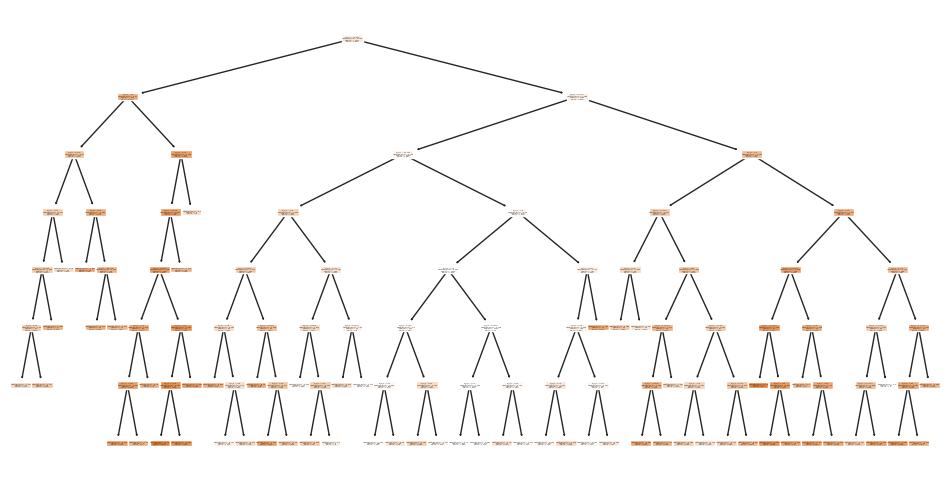

In [99]:
# Crear un árbol de decisión para regresión
decision_tree = DecisionTreeRegressor(criterion='squared_error',
                                       min_samples_split=35,
                                       min_samples_leaf=5,
                                       max_depth=optimal_depth)

# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R^2):", r2)

# Visualizar el árbol de decisión (opcional)
plt.figure(figsize=(12, 6))
tree.plot_tree(decision_tree, filled=True)
plt.show()

**¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?**
Para encontrar el mejor arbol voy cambiando y probando los distintos factores que alteran los resultados (min_samples_split y min_samples_leaf) y voy observando cual tiene el menor error cuadratico medio y mayor acurracy en test.

Evalue ambos con el conjunto de prueba y descubri que el arbol era mejor (Regresion linear obtuvo 0.1... y arbol de desicion 0.5...). Aparte, obtuve el error cuadratico medio en ambos y tambien obtuve mejores resultados en el arbol.

**Para el atributo categórico a predecir seleccionado
Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.**

In [105]:
y = datos['+25°C']
X = datos.drop(['+25°C'], axis=1)
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
model = linear_model.LogisticRegression()

In [108]:
# Realizar validación cruzada durante el entrenamiento
cv_scores = cross_val_score(model, X_train, y_train, cv=7, scoring='accuracy')

In [109]:
# Entrenar el modelo en todo el conjunto de entrenamiento
model.fit(X_train, y_train)

LogisticRegression()

In [110]:
# Calcular la precisión promedio en validación cruzada
avg_cv_accuracy = np.mean(cv_scores)
print("Precisión promedio en validación cruzada durante el entrenamiento:", avg_cv_accuracy)

Precisión promedio en validación cruzada durante el entrenamiento: 0.6893870979033218


In [111]:
# Hacer predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)

In [112]:
# Calcular la precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Precisión en el conjunto de prueba:", test_accuracy)

Precisión en el conjunto de prueba: 0.6965811965811965


**Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.**

In [113]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                         min_samples_split=20,
                                         min_samples_leaf=5,
                                         class_weight={1: 3.5})

In [114]:
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=10)
cv_scores

array([0.91466667, 0.89304813, 0.90374332, 0.90641711, 0.88770053,
       0.93048128, 0.89572193, 0.91176471, 0.93315508, 0.90106952])

In [115]:
avg_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()
max_accuracy = max(cv_scores)
print(avg_accuracy)
print(std_accuracy)
print(max_accuracy)

0.9077768270944742
0.01432249944304998
0.9331550802139037


In [116]:
optimal_depth = np.argmax(cv_scores) + 1
# Crear un árbol de decisión con la profundidad óptima (en este caso 4)
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth=optimal_depth,
                                            class_weight={1: 3.5})
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={1: 3.5}, criterion='entropy', max_depth=9,
                       min_samples_leaf=5, min_samples_split=20)

In [117]:
# Evaluar el modelo en el conjunto de prueba
y_pred = decision_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", test_accuracy)

Precisión en el conjunto de prueba: 0.8888888888888888


88.89


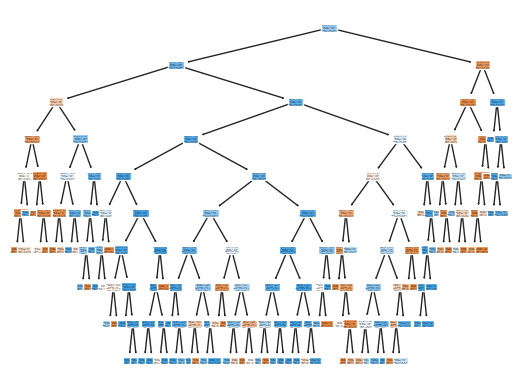

In [118]:
# Visualizar el árbol de decisión
tree.plot_tree(decision_tree, feature_names=X_train.columns.tolist(), class_names=['No Severo', 'Severo'], filled=True)

In [119]:
# Evaluar el modelo en el conjunto de prueba
y_pred = decision_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", test_accuracy)

Precisión en el conjunto de prueba: 0.8888888888888888


**Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?**

Al igual que con los primeros modelos, encontre el mejor arbol de decision ajustando los numeros de min split y leaf y evaluandolos en test. Tambien logre darme cuenta que el arbol de decision me dio mejores resultados luego de evaluarlo con los datos de test, los cuales compare de ambos y era mas exacto en el segundo.

**Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?**

Probamos usando la validacion cruzada en grupos y la individual, y lo que pudimos darnos cuenta es que quizas la random e individual era un poco mas eficiente, luego de probarlo con el primer modelo nos dimos cuenta que demoraba mucho y los resultados eran bastante similares. Es por esto que decidimos usar la validacion cruzada por grupos ya que demoraba menos de la mitad que la anterior y era casi igual de eficientes. La que deja solo de a uno afuera puede servir mas para cuando tenemos pocos datos y necesitamos aprovecharlos mas.

**Escribir una conclusión sobre el trabajo realizado.**

En este trabajo intentamos crear modelos que predigan el indice de uv que puede haber en un lugar dependiendo de distintas variables y tambien si la temperatura de este suele ser mayor o menor a 25°C. Vimos que en ambos casos nos resulto mas eficiente un arbol de desicion para predecir ya que era mas manipulable y se podía ajustar mejor a los datos. Por otro lado, la validacion cruzada nos sirvio ya que no teníamos tantos datos y logramos ahorrarlos para entrenar con todos los que teniamos.